# Task 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [2]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [3]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

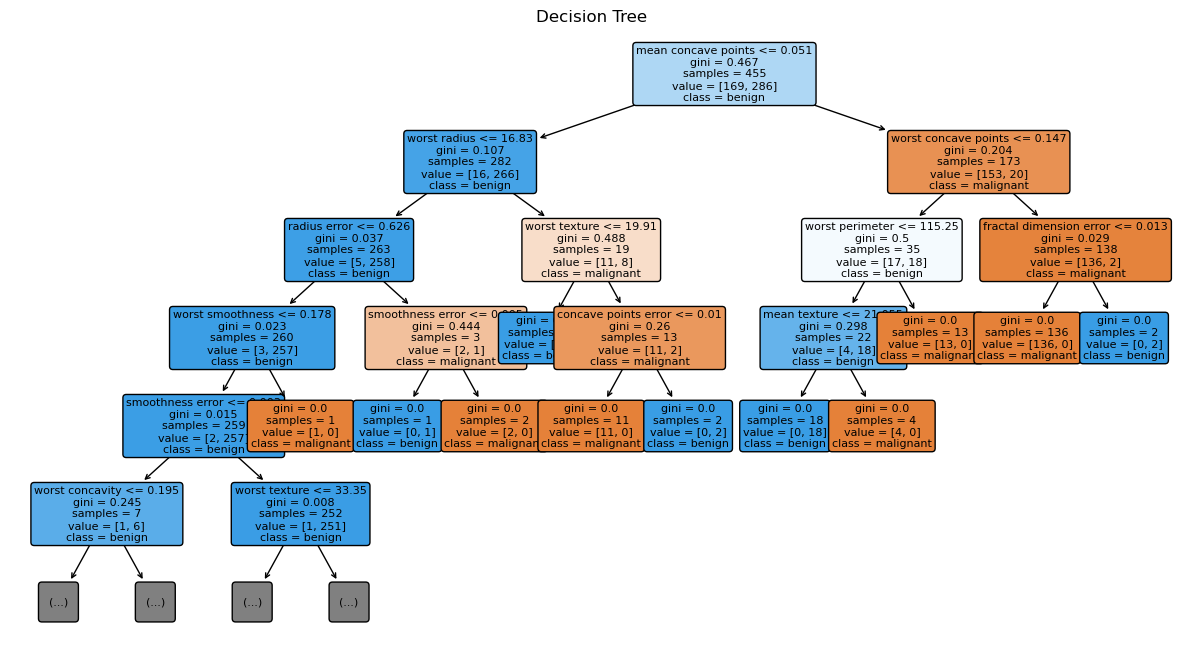

In [6]:
# Train Decision Tree and visualize, I have given mx depth as 5, you can alter as you wish
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
plt.figure(figsize=(15, 8))
plot_tree(dt, feature_names=data.feature_names, class_names=data.target_names,filled=True, rounded=True,max_depth=5, fontsize=8)
plt.title("Decision Tree")
plt.show()

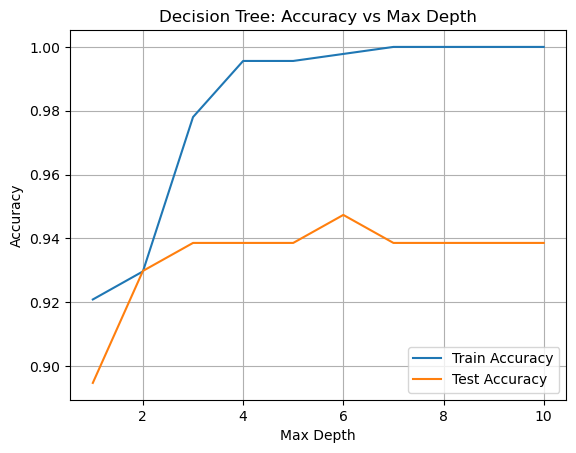

In [7]:
# Overfitting analysis by varying tree depth
depths = range(1, 11)
train_acc, test_acc = [], []
for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=0)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))
plt.plot(depths, train_acc, label='Train Accuracy')
plt.plot(depths, test_acc, label='Test Accuracy')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree: Accuracy vs Max Depth")
plt.legend()
plt.grid(True)
plt.show()

Decision Tree Accuracy: 0.9386
Random Forest Accuracy: 0.9649


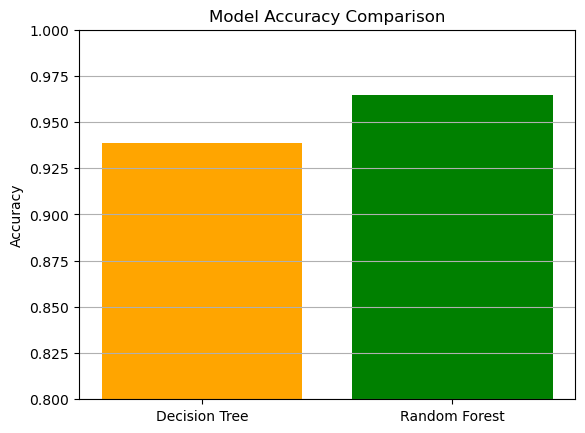

In [9]:
# Train Random Forest and compare
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
dt_acc = accuracy_score(y_test, dt.predict(X_test))
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
plt.bar(['Decision Tree', 'Random Forest'], [dt_acc, rf_acc], color=['orange', 'green'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.8, 1.0)
plt.grid(True, axis='y')
plt.show()

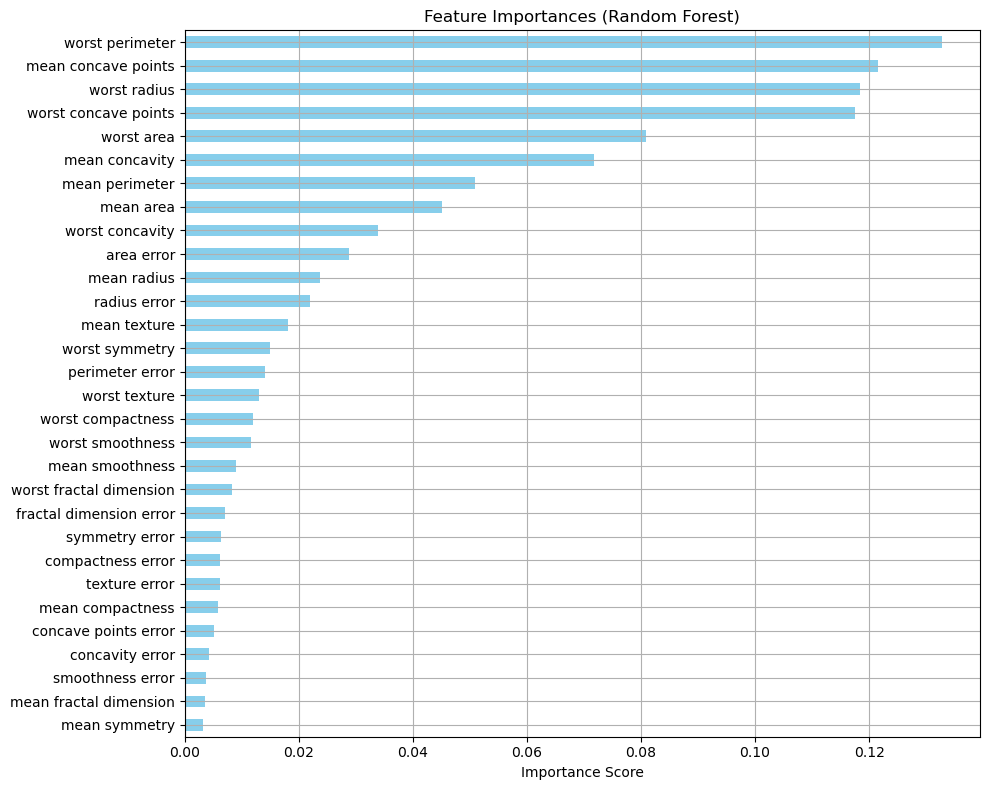

In [10]:
# Feature Importances from Random Forest
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# Cross-validation evaluation
cv_dt = cross_val_score(dt, X, y, cv=5)
cv_rf = cross_val_score(rf, X, y, cv=5)

print("Decision Tree CV Accuracy: Mean = {:.4f}, Std = {:.4f}".format(cv_dt.mean(), cv_dt.std()))
print("Random Forest CV Accuracy: Mean = {:.4f}, Std = {:.4f}".format(cv_rf.mean(), cv_rf.std()))

Decision Tree CV Accuracy: Mean = 0.9174, Std = 0.0164
Random Forest CV Accuracy: Mean = 0.9631, Std = 0.0217
